In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#!pip3 install torch===1.2.0 torchvision===0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!#pip install typeguard

In [ ]:
from fastai import *
from fastai.vision import *
import torch
import torchvision
import torch.nn as nn
import random
bs = 32
random.seed(23)

In [ ]:
%cd orig

/content/drive/My Drive/orig


In [ ]:
#!unzip 'data-orig.zip'

In [ ]:
path_img = Path('data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1180 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Valid: LabelList (398 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Test: None

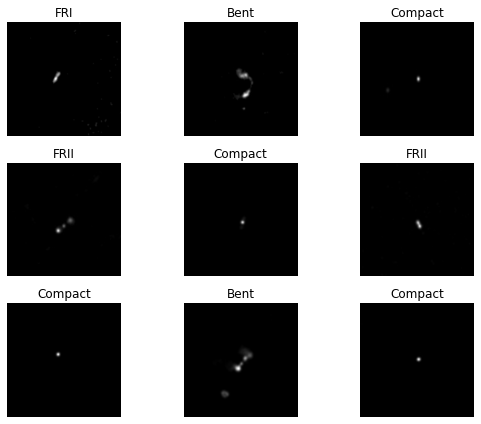

In [ ]:
data.show_batch(rows=3, figsize=(8,6))

In [ ]:
learn = cnn_learner(data, models.densenet161, opt_func=torch.optim.Adam, metrics=accuracy)
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


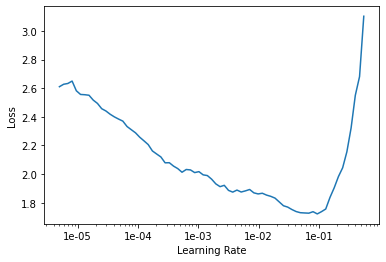

In [ ]:
learn.lr_find(start_lr=1e-6, end_lr=1e1, wd=5e-3)
learn.recorder.plot()

In [ ]:
def f_sched(*args):
    lr = 2e-3
    lrs = [lr/2., lr/2.,lr/2.,lr]
    return [combine_scheds([0.2,0.8], [SchedCos(lr/10.,lr), SchedCos(lr,lr/1e5)])(*args) for lr in lrs]

sched = {'lr': f_sched}

#learner.fit(1, cbs=ParamScheduler(sched))
#sched = {'lr': SchedLin(1e-4, 1e-3)}
#learn.fit(1, )
#learn.fit(1, cbs=torch.optim.lr_scheduler.MultiStepLR)
learn.fit(1, lr=slice(1e-4,1e-2), callbacks=ParamScheduler(f_sched))
learn.recorder.plot_losses()

NameError: ignored

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


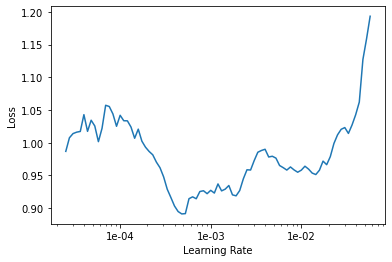

In [ ]:
learn.unfreeze()
learn.lr_find(start_lr=slice(1e-6, 1e-5), end_lr=slice(1e-2, 1e-1), wd=1e-3)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.910035,4.527872,0.404523,00:30
1,0.799092,0.816115,0.716080,00:30
2,0.617714,0.418747,0.851759,00:29


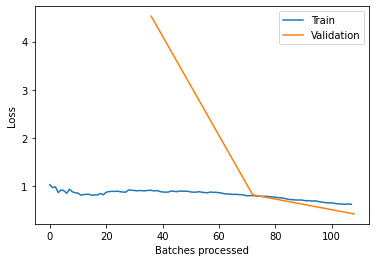

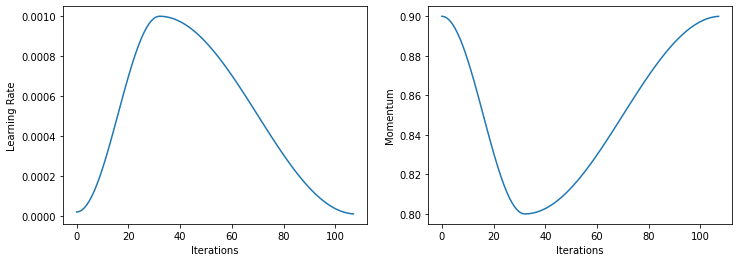

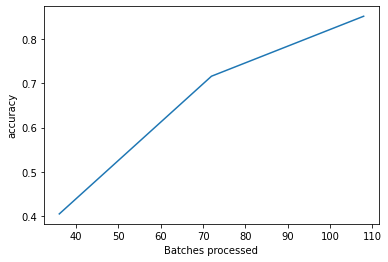

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-4, 1e-3), div_factor=50, final_div=100, wd=1e-4, moms=(0.9, 0.8))
learn.recorder.plot_losses()
# schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.515954,0.901782,0.708543,00:28
1,0.437529,0.417015,0.816583,00:28
2,0.389087,0.389854,0.869347,00:29
3,0.333774,0.361380,0.884422,00:29
4,0.311683,0.313093,0.871859,00:29
5,0.288612,0.429417,0.864322,00:29
6,0.247754,0.294817,0.902010,00:29
7,0.222584,0.303930,0.902010,00:29
8,0.183948,0.290580,0.907035,00:29
9,0.156546,0.269959,0.922111,00:29


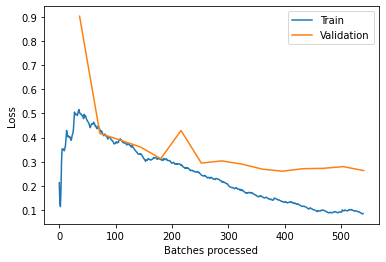

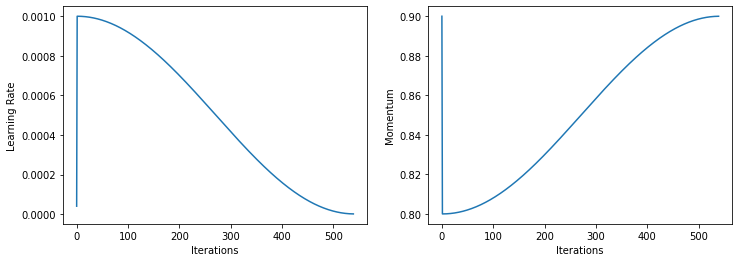

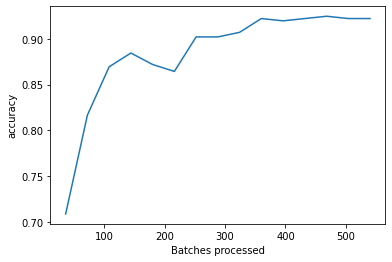

In [ ]:
learn.fit_one_cycle(cyc_len=15, max_lr=slice(1e-4, 1e-3), pct_start=0, final_div=1000, wd=1e-3, moms=(0.9, 0.8)) # warm restart: pct_start=0
#learn.save('stage-3')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [ ]:
learn.save('rg-adam-25Mar')

In [ ]:
learn.load('rg-adam-25Mar')
interp = ClassificationInterpretation.from_learner(learn)

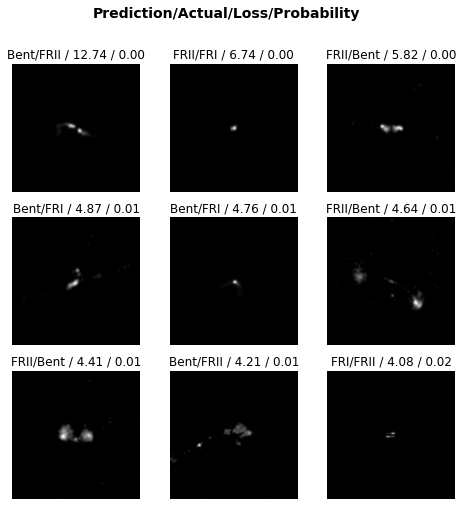

In [ ]:
interp.plot_top_losses(9, figsize=(8,8))

In [ ]:
losses, indexes = interp.top_losses(30)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data/valid/FRII/J151108.76+180153.2.jpeg') PosixPath('data/valid/FRI/J140956.99-012104.7.jpeg')
 PosixPath('data/valid/Bent/J081545.53+371035.5.jpg') PosixPath('data/valid/FRI/J141104.33-030043.3.jpeg')
 PosixPath('data/valid/Bent/J143448.92-021509.4.jpg') PosixPath('data/valid/FRI/J140313.27+061008.2.jpeg')
 PosixPath('data/valid/FRII/J145752.77+111809.5.jpg') PosixPath('data/valid/FRI/J143521.30-024051.7.jpg')
 PosixPath('data/valid/FRI/J143410.56+013646.9.jpg') PosixPath('data/valid/FRII/J144919.01+210548.0.jpg')
 PosixPath('data/valid/FRI/J115729.60+292308.2.jpg') PosixPath('data/valid/FRI/J141138.22+495304.0.jpg')
 PosixPath('data/valid/FRII/J144808.61+163439.5.jpg') PosixPath('data/valid/FRI/J143825.92-010001.5.jpg')
 PosixPath('data/valid/FRI/J140916.75+060139.5.jpg') PosixPath('data/valid/FRI/J143147.54+605109.5.jpg')
 PosixPath('data/valid/FRI/J143848.86+004059.2.jpg') PosixPath('data/valid/FRI/J123629.12+163232.1.jpg')
 PosixPath('data/valid/Bent/J163032.36+285414

In [ ]:
losses, indexes = interp.top_losses(30)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data/valid/FRII/J151108.76+180153.2.jpeg') PosixPath('data/valid/FRI/J140956.99-012104.7.jpeg')
 PosixPath('data/valid/Bent/J081545.53+371035.5.jpg') PosixPath('data/valid/FRI/J141104.33-030043.3.jpeg')
 PosixPath('data/valid/Bent/J143448.92-021509.4.jpg') PosixPath('data/valid/FRI/J140313.27+061008.2.jpeg')
 PosixPath('data/valid/FRII/J145752.77+111809.5.jpg') PosixPath('data/valid/FRI/J143521.30-024051.7.jpg')
 PosixPath('data/valid/FRI/J143410.56+013646.9.jpg') PosixPath('data/valid/FRII/J144919.01+210548.0.jpg')
 PosixPath('data/valid/FRI/J115729.60+292308.2.jpg') PosixPath('data/valid/FRI/J141138.22+495304.0.jpg')
 PosixPath('data/valid/FRII/J144808.61+163439.5.jpg') PosixPath('data/valid/FRI/J143825.92-010001.5.jpg')
 PosixPath('data/valid/FRI/J140916.75+060139.5.jpg') PosixPath('data/valid/FRI/J143147.54+605109.5.jpg')
 PosixPath('data/valid/FRI/J143848.86+004059.2.jpg') PosixPath('data/valid/FRI/J123629.12+163232.1.jpg')
 PosixPath('data/valid/Bent/J163032.36+285414

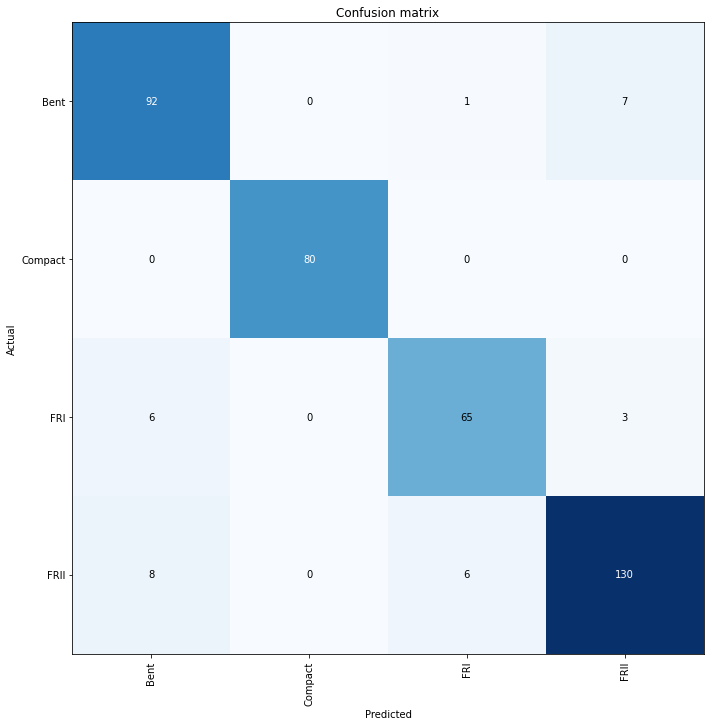

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
path_img = Path('data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1180 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Valid: LabelList (404 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: data;

Test: None

In [ ]:
learn = cnn_learner(data, models.densenet161, opt_func=torch.optim.Adam, metrics=accuracy)

In [ ]:
learn = learn.load('rg-adam-25Mar')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

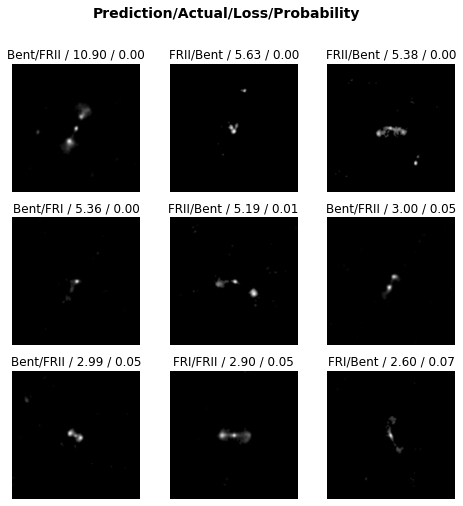

In [ ]:
interp.plot_top_losses(9, figsize=(8,8))

In [ ]:
losses, indexes = interp.top_losses(36)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data/test/FRII/J004312.83-103956.1.jpeg') PosixPath('data/test/Bent/J083841.50+444824.1.jpeg')
 PosixPath('data/test/Bent/J114525.98-022332.9.jpeg') PosixPath('data/test/FRI/J083140.32+125805.1.jpeg')
 PosixPath('data/test/Bent/J024558.53-064900.7.jpeg') PosixPath('data/test/FRII/J081303.31+132606.7.jpeg')
 PosixPath('data/test/FRII/J083754.15+154326.9.jpeg') PosixPath('data/test/FRII/J031357.03+001531.2.jpeg')
 PosixPath('data/test/Bent/J102902.08+494417.5.jpeg') PosixPath('data/test/FRI/J074901.67+351554.6.jpeg')
 PosixPath('data/test/Bent/J113026.82+243413.5.jpeg') PosixPath('data/test/Compact/J085836.52+541902.5.jpeg')
 PosixPath('data/test/Compact/J085732.64+304610.5.jpeg') PosixPath('data/test/FRII/J101028.96+074021.5.jpeg')
 PosixPath('data/test/FRI/J083714.33+354737.5.jpeg') PosixPath('data/test/FRII/J084325.64+290740.7.jpeg')
 PosixPath('data/test/FRI/J080332.14+251333.9.jpeg') PosixPath('data/test/Compact/J005830.07-011138.7.jpeg')
 PosixPath('data/test/FRI/J08345

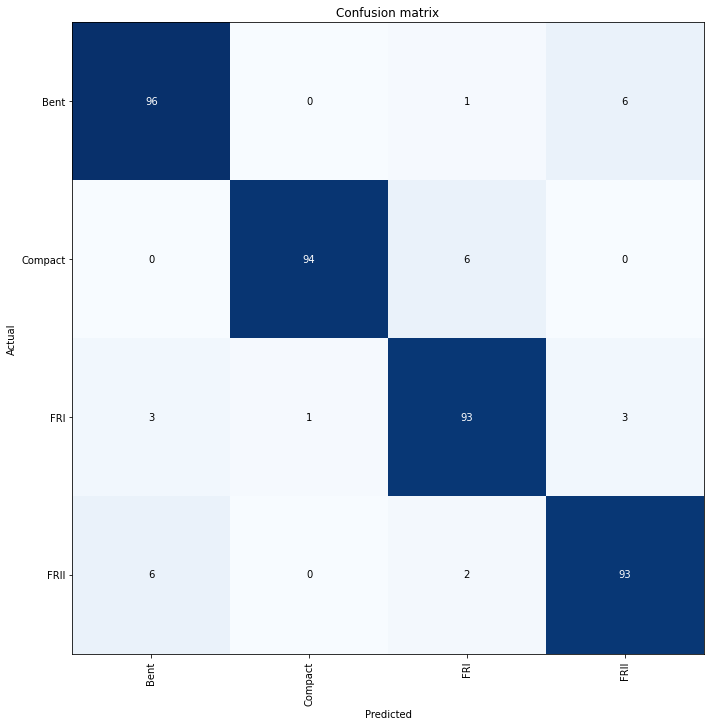

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
import glob

image_list = glob.glob('data/test/*/*')

Bent = 0
Pred_Bent=0
Compact=0
Pred_Compact=0
FRI=0
Pred_FRI=0
FRII=0
Pred_FRII = 0 

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    rg_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if rg_class == 'Bent':
        Bent += 1
        if pred_class == 'Bent':
            Pred_Bent += 1
            print(each[2:], pred_class)
        # else:
        #     print(each[2:], pred_class)
    elif rg_class == 'Compact':
        Compact += 1
        if pred_class == 'Compact':
            Pred_Compact += 1
            print(each[2:], pred_class)
        # else:
        #    print(each[2:], pred_class)
    elif rg_class == 'FRI':
        FRI += 1
        if pred_class == 'FRI':
            Pred_FRI += 1
            print(each[2:], pred_class)
        # else:
        #     print(each[2:], pred_class)
    elif rg_class == 'FRII':
        FRII += 1
        if pred_class == 'FRII':
            Pred_FRII += 1
            print(each[2:], pred_class)
        # else:
        #    print(each[2:], pred_class)
            
    
# print('TP Bent: ' + str(Pred_Bent) + '/' + str(Bent))
# print('TP Compact: ' + str(Pred_Compact) + '/' + str(Compact))
# print('TP FRI: ' + str(Pred_FRI) + '/' + str(FRI) )
# print('TP FRII: ' + str(Pred_FRII) + '/' + str(FRII) )

['Compact', 'J000325.23+004355.5.jpeg'] Compact
['Compact', 'J000140.36-010636.9.jpeg'] Compact
['Compact', 'J000140.21+010531.1.jpeg'] Compact
['Compact', 'J000400.88+001717.9.jpeg'] Compact
['Compact', 'J000027.89-010235.4.jpeg'] Compact
['Compact', 'J000001.58-092940.3.jpeg'] Compact
['Compact', 'J000134.96-085727.7.jpeg'] Compact
['Compact', 'J001503.37+003459.2.jpeg'] Compact
['Compact', 'J002142.25-090044.4.jpeg'] Compact
['Compact', 'J002722.71-104759.2.jpeg'] Compact
['Compact', 'J002833.42+005510.9.jpeg'] Compact
['Compact', 'J002235.86+003555.0.jpeg'] Compact
['Compact', 'J002331.60+010116.7.jpeg'] Compact
['Compact', 'J002351.21+000632.9.jpeg'] Compact
['Compact', 'J001511.48-011153.1.jpeg'] Compact
['Compact', 'J002306.96+010236.8.jpeg'] Compact
['Compact', 'J003055.39+001024.2.jpeg'] Compact
['Compact', 'J003230.91+002440.2.jpeg'] Compact
['Compact', 'J005805.37+002647.4.jpeg'] Compact
['Compact', 'J015152.78-100050.5.jpeg'] Compact
['Compact', 'J005719.19-095415.6.jpeg'] 